In [839]:
import pandas as pd
from selenium import webdriver
import time
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [1029]:
def checkName(user_query, index=False):
    """
    checkName uses a database lookup to return either SMILES or IUPAC 
    names of salts given either one of those are provided as inputs.
    Default behavior is to return the SMILES encoding of a salt given
    the salt name as input.
    
    Parameters
    ------------------
    user_query : str
        string that will be used to query the database.
        
    Returns
    ------------------
    output: str
        either the name of the salt, cation, or anion; or SMILES of the
        salt, cation, or anion (SMILES for the salt are written as the 
        cation and ion SMILES strings separated by a comma)
    """
    ###Check to see that the database is present
    if os.path.isfile('salty/data/saltInfo.csv') == False:
        print('database file missing... exiting')
        return 0
    df = pd.read_csv('salty/data/saltInfo.csv').astype(str)

    try:
        target_lookup = df.loc[(df == user_query).any(axis=1),:]
        input_type = df.loc[:,(df == user_query).any(axis=0)].columns.values
        target_column_index = df.columns.get_loc(input_type[0])
        target_row_index = df.loc[(df == user_query).any(axis=1),:].index.tolist()[0]

    except:
        print("query %s not found" % target_lookup)
        return 0

    #row_index pairs 1-4, 2-5, and 3-6
    if target_column_index == 1 or target_column_index == 2 or target_column_index == 3:
#         print("user has queried with a SMILES structure")
        target = target_lookup.iloc[0][target_column_index+3]
    else:
#         print("user has queried with a name")
        target = target_lookup.iloc[0][target_column_index-3]
#     print("your query has returned %s" % target)
    if index:
        return target, target_row_index
    else:
        return target

In [906]:
###a hacky hack solution to cleaning raw ILThermo data
df = pd.read_csv("../salty/data/viscosity_full.csv")
uniqueSalts = pd.DataFrame(df["salt_name"].unique(), columns=["salts"])
salts = uniqueSalts
anions=[]
cations=[]
for i in range(salts.shape[0]):
    if len(salts['salts'].iloc[i].split()) == 2:
        cations.append(salts['salts'].iloc[i].split()[0])
        anions.append(salts['salts'].iloc[i].split()[1])
    elif len(salts['salts'].iloc[i].split()) == 3:
        #two word cation
        if"tris(2-hydroxyethyl) methylammonium" in salts['salts'].iloc[i]:
            first = salts['salts'].iloc[i].split()[0]
            second = salts['salts'].iloc[i].split()[1]
            anions.append(salts['salts'].iloc[i].split()[2])
            cations.append(first + ' ' + second)
            
        #these strings have two word anions
        elif("sulfate" in salts['salts'].iloc[i] or\
        "phosphate" in salts['salts'].iloc[i] or\
        "phosphonate" in salts['salts'].iloc[i] or\
        "carbonate" in salts['salts'].iloc[i]):
            first = salts['salts'].iloc[i].split()[1]
            second = salts['salts'].iloc[i].split()[2]
            cations.append(salts['salts'].iloc[i].split()[0])
            anions.append(first + ' ' + second)
        elif("bis(trifluoromethylsulfonyl)imide" in salts['salts'].iloc[i]): 
            #this string contains 2 word cations
            first = salts['salts'].iloc[i].split()[0]
            second = salts['salts'].iloc[i].split()[1]
            third = salts['salts'].iloc[i].split()[2]
            cations.append(first + ' ' + second)
            anions.append(third)
        else:
            print(salts['salts'].iloc[i])
    elif len(salts['salts'].iloc[i].split()) == 4:
        #this particular string block contains (1:1) at end of name
        if("1,1,2,3,3,3-hexafluoro-1-propanesulfonate" in salts['salts'].iloc[i]):
            first = salts['salts'].iloc[i].split()[0]
            second = salts['salts'].iloc[i].split()[1]
            cations.append(first + ' ' + second)
            anions.append(salts['salts'].iloc[i].split()[2])
        else:
            #and two word anion
            first = salts['salts'].iloc[i].split()[1]
            second = salts['salts'].iloc[i].split()[2]
            anions.append(first + ' ' + second)
            cations.append(salts['salts'].iloc[i].split()[0])
    elif("2-aminoethanol-2-hydroxypropanoate" in salts['salts'].iloc[i]):
        #one of the ilthermo salts is missing a space between cation/anion
        anions.append("2-hydroxypropanoate")
        cations.append("2-aminoethanol")
    elif len(salts['salts'].iloc[i].split()) == 5:
        if("bis[(trifluoromethyl)sulfonyl]imide" in salts['salts'].iloc[i]):
            anions.append("bis(trifluoromethylsulfonyl)imide")
            first = salts['salts'].iloc[i].split()[0]
            second = salts['salts'].iloc[i].split()[1]
            third = salts['salts'].iloc[i].split()[2]
            fourth = salts['salts'].iloc[i].split()[3]
            cations.append(first + ' ' + second + ' ' + third + ' ' + fourth)
        if("trifluoro(perfluoropropyl)borate" in salts['salts'].iloc[i]):
            anions.append("trifluoro(perfluoropropyl)borate")
            cations.append("N,N,N-triethyl-2-methoxyethan-1-aminium")    
    else:
        print(salts['salts'].iloc[i])
anions = pd.DataFrame(anions)
anions = anions[0].unique()
cations = pd.DataFrame(cations)
cations = cations[0].unique()
len(cations)

313

In [840]:
df = pd.read_csv("../salty/data/viscosity_full.csv")
driver = webdriver.Chrome()
driver.get("http://www.chemspider.com/")
time.sleep(5)

In [841]:
ions = cations
#ions_smiles = []
timeout = 15
for i in range(len(ions)):
    ion = ions[i]
    ion_df = pd.read_csv("../salty/data/cationInfo.csv") #cationInfo or anionInfo
    if any(ion in s for s in ion_df.cation): #set to anion or cation depending on df
        pass
    elif any(ion in s for s in ions_smiles):
        pass
    else:
        try:
            search = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_qs_query\"]")
            search.clear()
            search.send_keys(ion)
            submit = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_search_btn\"]")
            submit.click()
            time.sleep(5)
            ###try to get as a direct result
            try:
                moreDetails = driver.find_element_by_xpath("//*[@id=\"ctl00"\
                "_ctl00_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                "_rptDetailsView_ctl00_structureHead\"]/div[2]/div/h2/a/span")
                moreDetails.click()
                time.sleep(2)
                smiles = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00"\
                    "_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                    "_rptDetailsView_ctl00_moreDetails_WrapControl2\"]")
                ions_smiles.append([ion, smiles.text])
                print(ion, smiles.text, "found as direct search return")
                time.sleep(3)
            except:
                ###try to get as the first of many results
                try:
                    firstSearchResult= driver.find_element_by_xpath("//*[@id=\"ctl00_"\
                        "ctl00_ContentSection_ContentPlaceHolder1_ResultViewControl1_grid"\
                        "_GridView1\"]/tbody/tr[1]/td[1]/a")
                    firstSearchResult.click()
                    time.sleep(5)
                    moreDetails = driver.find_element_by_xpath("//*[@id=\"ctl00"\
                        "_ctl00_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                        "_rptDetailsView_ctl00_structureHead\"]/div[2]/div/h2/a/span")
                    moreDetails.click()
                    time.sleep(2)
                    smiles = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00"\
                        "_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                        "_rptDetailsView_ctl00_moreDetails_WrapControl2\"]")
                    ions_smiles.append([ion, smiles.text])
                    print(ion, smiles.text, "found as first of many search returns")
                    time.sleep(3)
                ###try to get as a partial match
                except:
                    partialMatch = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_"\
                        "ContentSection_ContentPlaceHolder1_ResultViewControl1_ResultStatement"\
                        "Control1_plhMessage\"]/a")
                    partialMatch.click()
                    time.sleep(6)
                    firstSearchResult= driver.find_element_by_xpath("//*[@id=\"ctl00_"\
                        "ctl00_ContentSection_ContentPlaceHolder1_ResultViewControl1_grid"\
                        "_GridView1\"]/tbody/tr[1]/td[1]/a")
                    firstSearchResult.click()
                    time.sleep(5)
                    moreDetails = driver.find_element_by_xpath("//*[@id=\"ctl00"\
                        "_ctl00_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                        "_rptDetailsView_ctl00_structureHead\"]/div[2]/div/h2/a/span")
                    moreDetails.click()
                    time.sleep(2)
                    smiles = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00"\
                        "_ContentSection_ContentPlaceHolder1_RecordViewDetails"\
                        "_rptDetailsView_ctl00_moreDetails_WrapControl2\"]")
                    ions_smiles.append([ion, smiles.text])
                    print(ion, smiles.text, "found as first return of partial match")
                    time.sleep(3)
        except:
            time.sleep(10)
            print("SMILES not found for %s" % ion)

KeyboardInterrupt: 

In [1028]:
from rdkit.Chem import SanitizeMol as san
ion_df = pd.read_csv("../salty/data/cationInfo.csv") #cationInfo or anionInfo
ions = ion_df.smiles
for i in range(len(ions)):
    ion = ions[i]
    try:
        san(mol(ion))
    except:
        print(ion, i, ion_df.cation[i])
    if "+" in ion:
        pass
    else:
        print(ion, i, ion_df.cation[i])
    if "." in ion:
        print(ion, i, ion_df.cation[i]) 

/home/wesley/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


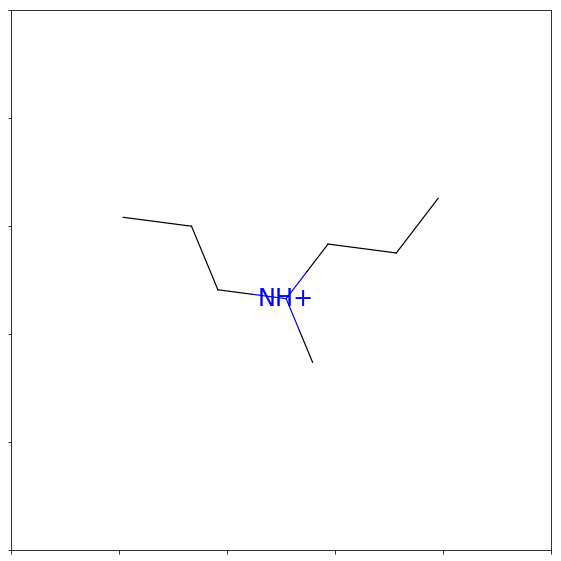

In [1016]:
from rdkit.Chem import MolFromSmiles as mol
from rdkit.Chem.Draw import MolToMPL as img
img(mol("CCC[NH+](C)CCC"))

In [916]:
ion_df4 = pd.DataFrame(ions_smiles, columns=["cation","smiles"])
ion_df5 = pd.read_csv("../salty/data/cationInfo.csv")
frames = [ion_df5, ion_df4]
result = pd.concat(frames)
result = result.drop_duplicates(subset="cation")

In [1027]:
pd.DataFrame.to_csv(ion_df, path_or_buf="../salty/data/cationInfo.csv", index=False)

In [914]:
ions_smiles

[['1-butyl-2-methylpyridinium', 'CCCC[n+]1ccc(cc1)C'],
 ['trihexyltetradecylphosphonium', 'C[n+]1cc[nH]c1'],
 ['1-ethyl-3-methyl-1H-imidazolium', 'CCN1CN(C=C1)C'],
 ['1-(2-methoxyethyl)-1-methylpyrrolidinium', 'C[N+]1(CCCC1)CCOC'],
 ['3-ethyl-1-methyl-1H-imidazolium', 'C1=C[N+](C)=CN1CC'],
 ['1-butyl-3-methyl-1H-imidazolium', 'C1=C[N+](CCC)=CN1C'],
 ['1-methyl-3-octyl-1H-imidazolium', 'C1=C[N+](C)=CN1CCCCCCCC'],
 ['3-methyl-1-undecyl-1H-imidazol-3-ium', 'CCCCCCCCCCC[n+]1ccn(c1)C'],
 ['1-methyl-3-propylimidazolium', 'CCCn1cc[n+](c1)C'],
 ['N,N,N-triethyl-1-decanaminium', 'C(CCCCCCCC[N+](CC)(CC)CC)C'],
 ['N,N,N-triethyldodecan-1-aminium', 'CCCCCCCCCCCC[N+](CC)(CC)CC'],
 ['N,N,N-triethyltetradecan-1-aminium', 'CCCCCCCCCCCCCC[N+](CC)(CC)CC'],
 ['N-methyl-2-hydroxyethylammonium', 'OCC[NH2+]C'],
 ['butyltrimethylammonium', 'CCCC[N+](C)(C)C'],
 ['tributylmethylammonium', 'CCCC[N+](C)(CCCC)CCCC'],
 ['triethylsulfonium', 'CC[S+](CC)CC'],
 ['diethylmethylsulfonium', '[S+](C)(CC)(CC)'],
 ['3-cyan

In [902]:
ion_df3 = ion_df3.rename(index=str, columns={"anion": "cation"})


In [904]:
# ion_df3 = pd.read_csv("../salty/data/cationInfo_.csv")
# ion_df = pd.read_csv("../salty/data/cationInfo.csv")
frames = [ion_df3, ion_df]
result = pd.concat(frames)
pd.DataFrame.to_csv(result, path_or_buf="../salty/data/cationInfo.csv", index=False)

In [41]:
df = pd.read_csv("../salty/data/viscosity_full.csv")
len(df["salt_name"].unique())

559